# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
#sys.path.append("./")
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn.FuzzyNetwork import FuzzyNetwork

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            ifpart_thresh=0.1354, err_delta=0.12        # evaluation and ifpart threshold
            )

Building Fuzzy Network with 5 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


In [5]:
fuzz.compile_model()

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 5)            40          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 5)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 5)            25          Inputs[0][0]                     
                                                                 Normalization[0][0]      

In [6]:
fuzz.train_model(epochs=150)

Training model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
135/135 [==============================] - 0s 972us/step - loss: 10.2022 - binary_accuracy: 0.6667
Epoch 2/150
135/135 [==============================] - 0s 33us/step - loss: 10.1477 - binary_accuracy: 0.6667
Epoch 3/150
135/135 [==============================] - 0s 31us/step - loss: 10.0932 - binary_accuracy: 0.6667
Epoch 4/150
135/135 [==============================] - 0s 22us/step - loss: 10.0630 - binary_accuracy: 0.6667
Epoch 5/150
135/135 [==============================] - 0s 31us/step - loss: 10.0082 - binary_accuracy: 0.6667
Epoch 6/150
135/135 [==============================] - 0s 30us/step - loss: 9.9603 - binary_accuracy: 0.6667
Epoch 7/150
135/135 [==============================] - 0s 26us/step - loss: 9.9263 - binary_accuracy: 0.6667
Epoch 8/150
135/135 [==============================] - 0s 33us/step - loss: 9.8763 - binary_accuracy: 0.6667
Epoch 9/150
135/135 [==============================] - 0

135/135 [==============================] - 0s 22us/step - loss: 6.1507 - binary_accuracy: 0.8815
Epoch 73/150
135/135 [==============================] - 0s 22us/step - loss: 6.2020 - binary_accuracy: 0.8790
Epoch 74/150
135/135 [==============================] - 0s 22us/step - loss: 6.1387 - binary_accuracy: 0.8790
Epoch 75/150
135/135 [==============================] - 0s 26us/step - loss: 6.0386 - binary_accuracy: 0.8790
Epoch 76/150
135/135 [==============================] - 0s 23us/step - loss: 5.9835 - binary_accuracy: 0.8790
Epoch 77/150
135/135 [==============================] - 0s 22us/step - loss: 6.0242 - binary_accuracy: 0.8790
Epoch 78/150
135/135 [==============================] - 0s 23us/step - loss: 5.8886 - binary_accuracy: 0.8790
Epoch 79/150
135/135 [==============================] - 0s 30us/step - loss: 5.9347 - binary_accuracy: 0.8790
Epoch 80/150
135/135 [==============================] - 0s 30us/step - loss: 5.7795 - binary_accuracy: 0.8765
Epoch 81/150
135/135 [=

135/135 [==============================] - 0s 22us/step - loss: 3.4257 - binary_accuracy: 0.8667
Epoch 147/150
135/135 [==============================] - 0s 31us/step - loss: 3.4486 - binary_accuracy: 0.8667
Epoch 148/150
135/135 [==============================] - 0s 22us/step - loss: 3.3268 - binary_accuracy: 0.8667
Epoch 149/150
135/135 [==============================] - 0s 22us/step - loss: 3.4221 - binary_accuracy: 0.8667
Epoch 150/150
135/135 [==============================] - 0s 22us/step - loss: 3.3393 - binary_accuracy: 0.8667


In [7]:
fuzz.get_layer_weights('FuzzyRules')

[array([[ 4.340144  ,  4.9670773 ,  5.99697   ,  4.5931993 ,  6.2362003 ],
        [ 3.3195999 ,  3.766348  ,  2.7049441 ,  3.386258  ,  2.1225896 ],
        [ 0.9890454 ,  1.0195891 ,  5.6948314 ,  1.0000889 ,  4.897026  ],
        [-0.36432946, -0.33744803,  2.7650352 , -0.4488991 ,  1.7654049 ]],
       dtype=float32),
 array([[3.6639457, 3.676773 , 4.1988063, 3.7170107, 3.5357537],
        [4.21414  , 3.9499574, 3.8005855, 3.7536545, 2.9771671],
        [3.3514779, 3.393794 , 3.0497224, 3.4241357, 3.3027499],
        [3.2429347, 3.2824366, 3.0316477, 3.3298666, 3.8128457]],
       dtype=float32)]

In [8]:
X_test

array([[4.7, 3.2, 1.6, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.2, 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 3.5, 1.3, 0.3],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3. , 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 2.9, 4.7, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [5. , 3.4, 1.6, 0.4],
       [5.6, 2.7, 4.2, 1.3]])

In [9]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [10]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [11]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True]])

In [12]:
acc.sum() / acc.size

0.8666666666666667

## Model Prediction Results

In [13]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 2ms/step
Model Loss: 1.61509216
Binary Accuracy: 86.7%


In [14]:
fuzz.model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

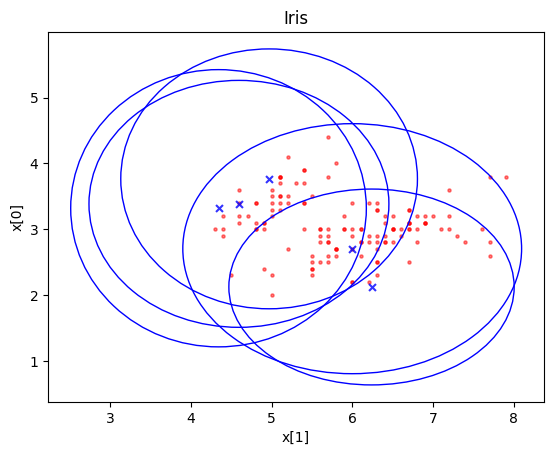

In [15]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()